#                    Project 1
##                      FYS3150
####                                                  Ana Planes Hernández
####                                                        09/09/2019




### Project 1(a)

In this first part of the project we simply write the equations in a discretised way.
Although we are not asked to, the equation will be found in a numerical way and plots will be made to compare both the numerical and analytical solution

First, we create empty arrays to fill them using a loop in which the equations are defined. We use n=10 and n=100

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# I have found a numerical solution for u this way first, and made plots to compare it to the analytical solution
# Afterwards, we solve it using a matrix and carrying out Gaussian elimination

n=10
h=1/(n+1)

u = np.zeros(n+2)      #create empty arrays to fill in later with the loop
x = np.zeros(n+2)
f = np.zeros(n+2)
u[0] = 0              #boundary conditions
u[n+1] = 0
x[0] = 0              #interval considered x∈(0,1)
x[n+1] = 1
    
for i in range (1, n+1):
    x[i] = i*h
    u[i]= 1 - (1 - np.e**(-10))*x[i] - np.e**(-10*x[i])
    f[i] = ( u[i+1] + u[i-1] - 2*u[i]) / (h**2)
    print (i,x[i],f[i],u[i])
        

1 0.09090909090909091 -122.50154098840459 0.5062047148281181
2 0.18181818181818182 -97.4696391967 0.6558694615326541
3 0.2727272727272727 -80.81661996828699 0.6618877058418932
4 0.36363636363636365 -67.53937142985343 0.6100321646145558
5 0.4545454545454546 -55.622188230114254 0.5348598353242789
6 0.5454545454545454 -44.252962191982334 0.4502933977942979
7 0.6363636363636364 -33.10450279087451 0.3619421649751428
8 0.7272727272727273 -22.044988131140244 0.27206607476501043
9 0.8181818181818182 -11.021308446856336 0.18157563427034132
10 0.9090909090909092 -0.01206632735354718 0.0908376779920035


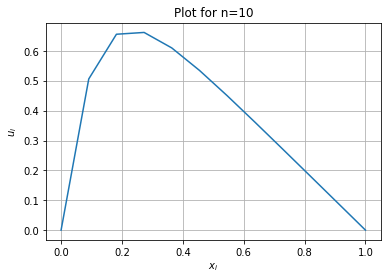

In [3]:
# a plot for the solution is shown

plt.plot(x,u)
plt.xlabel('$x_{i}$')
plt.ylabel('$u_{i}$')
plt.title ('Plot for n=10')
plt.grid()
plt.show()

Now, we carry out the same thing but using n=100

In [3]:
n2=100
h2=1/(n2-1)

u2 = np.zeros(n2+1)   #create empty arrays to fill in later
x2 = np.zeros(n2+1)
f2 = np.zeros(n2+1)
u2[0] = 0            #boundary conditions
u2[n2] = 0
x2[0] = 0            #interval considered
x2[n2] = 1
    
for k in range (n2):
    x2[k] = k*h2
    u2[k]= 1 - (1 - np.e**(-10))*x2[k] - np.e**(-10*x2[k])
    f2[k] = ( u2[k+1] + u2[k-1] - 2*u2[k]) / (h2**2)
    #print (k,x2[k],f2[k])
        

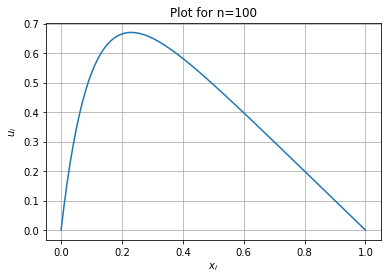

In [5]:
# a plot for the solution when n=100 is shown

plt.plot(x2,u2)
plt.xlabel('$x_{i}$')
plt.ylabel('$u_{i}$')
plt.title ('Plot for n=100')
plt.grid()
plt.show()

Now, we write the exact function, which we know $v_{i}$ , and plot it in order to compare it to what we have obtained with a numerical method.

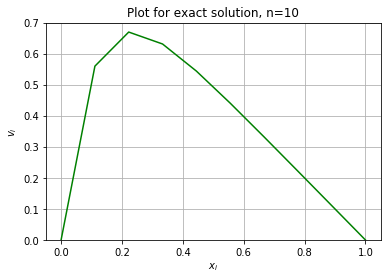

In [4]:
#make a plot of the exact function

def v (c):
    return 1 - (1-np.e**(-10))*c - np.e**(-10*c)

s= np.linspace(0,1,10)       #sequence for s from 0 to 1, 10 items.

plt.plot(s,[v(p) for p in s],'g')
plt.ylim(0,0.7)
plt.xlabel('$x_{i}$')
plt.ylabel('$v_{i}$')
plt.title ('Plot for exact solution, n=10')
plt.grid()
plt.show()

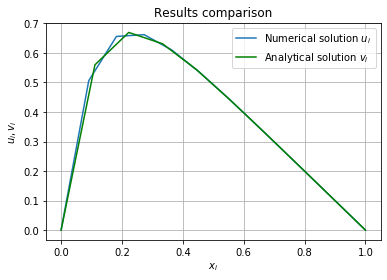

In [7]:
#we compare both plots for n=10.

plt.figure()
plt.ioff()
plt.plot(x,u)                       #the blue one is the computed one
plt.plot(s,[v(p) for p in s],'g')   #the green one is the exact one
plt.xlabel('$x_{i}$')
plt.ylabel('$u_{i}, v_{i}$')
plt.title ('Results comparison')
plt.legend(['Numerical solution $u_{i}$','Analytical solution $v_{i}$'])
plt.grid()
plt.show()   

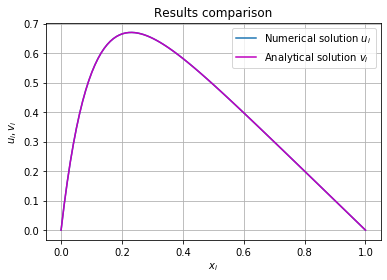

In [6]:
#comparison for n=100

s2= np.linspace(0,1,100)
plt.figure()
plt.ioff()
plt.plot(x2,u2)                       #the blue one is the computed one
plt.plot(s2,[v(p) for p in s2],'m')   #the green one is the exact one
plt.xlabel('$x_{i}$')
plt.ylabel('$u_{i}, v_{i}$')
plt.title ('Results comparison')
plt.legend(['Numerical solution $u_{i}$','Analytical solution $v_{i}$'])
plt.grid()
plt.show()   

In [8]:
#computed solution
u

array([0.        , 0.50620471, 0.65586946, 0.66188771, 0.61003216,
       0.53485984, 0.4502934 , 0.36194216, 0.27206607, 0.18157563,
       0.09083768, 0.        ])

In [9]:
#exact solution
v(s)

array([0.00000000e+00, 5.59700946e-01, 6.69419843e-01, 6.31007807e-01,
       5.43832105e-01, 4.40603746e-01, 3.32090966e-01, 2.21838591e-01,
       1.11013554e-01, 5.86824426e-18])

 ### Project 1(b). Gaussian elimination
 

We develop an algorithm for the Gaussian elimination. 
The vector d is in the diagonal, and there are a and c up and down the diagonal.

The Gaussian elimination is an algorithm used to resolve linear equations, by removing every entry in the matrix except for the diagonal, with the objective to make the equations immediate to resolve.

In [29]:
f2 = 100*np.exp(-10*x)   #this, we know. we want to find u

In [117]:
# GAUSSIAN ELIMINATION

d = np.zeros(n+2)                #define the empty vectors and slowly fill them in
g = h**2 * f2
gt = np.zeros(n+2)
dt = np.zeros(n+2)
a = np.zeros(n+1)
c = np.zeros(n+1)
u2 = np.zeros(n+2)

a[:] = -1.0
d[:] = 2.0
c[:] = -1.0
a[0] = a[-1] = np.nan
c[0] = c[-1] = np.nan
d[0] = d[-1] = np.nan
dt[1] = d[1]
dt[n-1] = d[n-1]
gt[1] = g[1]

#Algorithm for forward substitution

for i in range (2, n+1):                                     # 6 floating point operations.
    dt[i] = d[i] - (a[i-1]*c[i-1])/dt[i-1]
    gt[i] = g[i] - gt[i-1]*a[i-1]/dt[i-1] 
    
#Algorithm for backward substitution

u2[n] = gt[n] / dt[n]
for i in range(n-1, 0, -1):                                  # 3 floating point operations in total.
    u2[i] = (gt[i]-c[i]*u2[i+1]) / dt[i]

In [114]:
u2 #solution we seek (we obtain almost the same numerical solution as it was found first of all)

array([0.        , 0.47273682, 0.61250643, 0.61812678, 0.56969968,
       0.4994974 , 0.4205221 , 0.33801224, 0.25407833, 0.1695707 ,
       0.08483191, 0.        ])

### Project 1(c)

 We will slightly modify the previous algorithm  in (b), considerind that a = c

In [32]:
               #define the empty vectors and slowly fill them in
e = np.zeros(n+1)
u22 = np.zeros(n+2)

e[:] = -1.0
e[0] = e[-1] = np.nan

#Algorithm for forward substitution

for i in range (2, n+1):                                   
    dt[i] = d[i] - (e[i-1]**2)/dt[i-1]
    gt[i] = g[i] - gt[i-1]*e[i-1]/dt[i-1] 
    
#Algorithm for backward substitution

u22[n] = gt[n] / dt[n]
for i in range(n-1, 0, -1):                                  
    u22[i] = (gt[i]-e[i]*u22[i+1]) / dt[i]

In [33]:
u22   # the same thing is obtained

array([0.        , 0.47273682, 0.61250643, 0.61812678, 0.56969968,
       0.4994974 , 0.4205221 , 0.33801224, 0.25407833, 0.1695707 ,
       0.08483191, 0.        ])

### Project 1(d). Relative error.

In [35]:
n= 10                  #we only change this number to get the different values of u for n=10,100,1000...
h=1/(n+1)
u = np.zeros(n)        #create empty arrays to fill in later with the loop
x = np.zeros(n)
f = np.zeros(n)
u[0] = 0               #boundary conditions
u[n-1] = 0
x[0] = 0               #interval considered x∈(0,1)
x[n-1] = 1   
for i in range (1, n-1):
    x[i] = i*h
    u[i]= 1 - (1 - np.e**(-10))*x[i] - np.e**(-10*x[i])
    f[i] = ( u[i+1] + u[i-1] - 2*u[i]) / (h**2)
        
        
#EXACT SOLUTION 
def v (s):
    return 1 - (1-np.e**(-10))*s - np.e**(-10*s)

s=np.linspace(0,1,n)

#MAXIMUM RELATIVE ERROR 

er = np.log10 ( abs((u[1:] - v(s[1:])) / v(s[1:]))  )    #this is the formula for the relative error. 
                                                         #we look for the maximum each time.

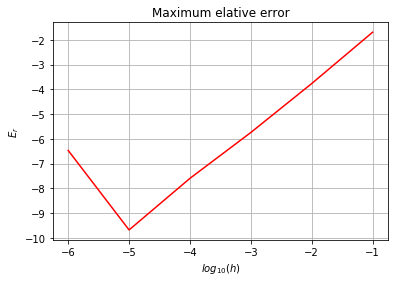

In [37]:
m = [10,100,1000,10000,100000,1000000]
h2 = [1/10,1/100,1/1000,1/10000,1/100000,1/1000000]
logh = [-1,-2,-3,-4,-5,-6]                                 # log10(h)
mer = [-1.6937470465853528,-3.766613786297319,-5.7428013315688125,-7.5950517583660115,-9.678467131793056,
      -6.468961794980336]                                 #we write the obtained numbers in a list and plot it.

plt.plot(logh,mer,'r')
plt.xlabel('$log_{10}(h)$')
plt.ylabel('$E_{r}$')
plt.title('Maximum elative error')
plt.grid()
plt.show()